In [1]:
import nengo
from nengo import spa
from nengo.synapses import filt
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline
from constants import *

rng = np.random.RandomState(0)
vocab = spa.Vocabulary(D, unitary=["ONE"], rng=rng)
number_dict = {"ONE":1, "TWO":2, "THREE":3, "FOUR":4, "FIVE":5,
               "SIX":6, "SEVEN":7, "EIGHT":8, "NINE":9}
number_ordered = OrderedDict(sorted(number_dict.items(), key=lambda t: t[1]))

number_list = number_ordered.keys()
for i in range(number_range):
    print(number_list[i])
    vocab.add(number_list[i+1], vocab.parse("%s*ONE" % number_list[i]))

join_num = "+".join(number_list[0:number_range])
print(join_num)

ONE
TWO
THREE
FOUR
FIVE
SIX
SEVEN
EIGHT
ONE+TWO+THREE+FOUR+FIVE+SIX+SEVEN+EIGHT


In [2]:
c_d = np.load("data/count_data.npz")
b_d = np.load("data/bg_data.npz")
l_d = np.load("data/learning_data.npz")

In [3]:
error = l_d["p_error"]

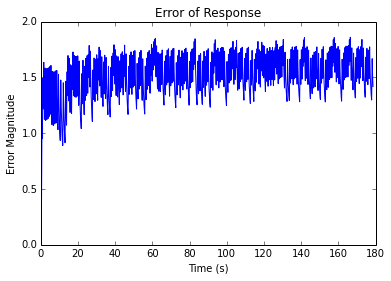

In [19]:

dt = 0.001
t_len = error.shape[0]
t = np.arange(dt*t_len, step=dt)
plt.plot(t, filt(np.linalg.norm(error, axis=1), 0.5, dt=0.001))
plt.ylabel("Error Magnitude")
plt.xlabel("Time (s)")
plt.title("Error of Response")

In [8]:
synapse = 0.005
recall = filt(l_d["p_recall"], synapse, dt=0.001)

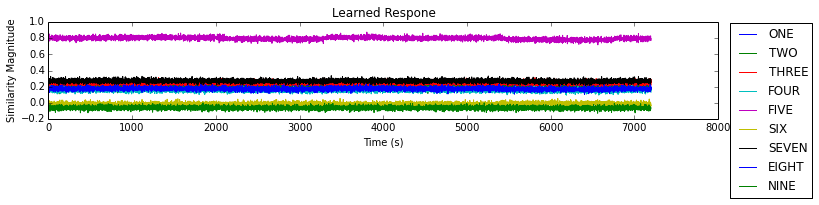

In [18]:
fig = plt.figure(figsize=(12,8))

win = -400*18

p1 = fig.add_subplot(4,1,3)
dt = 0.001
t_len = recall[win:,:].shape[0]
t = np.arange(dt*t_len, step=dt)
p1.plot(spa.similarity(recall[win:,:], vocab))
p1.legend(vocab.keys, bbox_to_anchor=(1.15, 1.05))
p1.set_title("Learned Respone")
p1.set_ylabel("Similarity Magnitude")
p1.set_xlabel("Time (s)")
p1.get_xaxis().get_major_formatter().set_useOffset(False)

In [15]:
t_len = recall[win:,:].shape[0]

In [16]:
dt = 0.001
t = np.arange(dt*t_len, step=dt)

In [13]:
np.arange?